In [1]:
import (
    "os"
    "log"
    "bytes"
    "fmt"
    "image/color"
    
    "gonum.org/v1/plot"
    "gonum.org/v1/plot/plotter"
    "gonum.org/v1/plot/vg"
    "github.com/go-gota/gota/dataframe"
)

In [2]:
func displayPlot(p *plot.Plot) {
    var buf bytes.Buffer
    c, err := p.WriterTo(6*vg.Inch, 6*vg.Inch, "png")
    if err != nil {
        panic(err)
    }
    
    if _, err := c.WriteTo(&buf); err != nil {
        panic(err)
    }
    
    Display(display.PNG(buf.Bytes()))
}

In [3]:
loanDataFile, err := os.Open("clean_loan_data.csv")
if err != nil {
    log.Fatal(err)
}
loanDF := dataframe.ReadCSV(loanDataFile)
loanDataFile.Close()

In [4]:
loanSummary := loanDF.Describe()
_, _ = fmt.Println(loanSummary)

[8x3] DataFrame

    column   FICO_score class
 0: mean     0.346782   0.396800
 1: median   0.315800   0.000000
 2: stddev   0.184383   0.489332
 3: min      0.000000   0.000000
 4: 25%      0.210500   0.000000
 5: 50%      0.315800   0.000000
 6: 75%      0.447400   1.000000
 7: max      1.000000   1.000000
    <string> <float>    <float>



In [5]:
func displayScatterPlot(colName string) {
    plotVals := make(plotter.Values, loanDF.Nrow())
    for i, floatVal := range loanDF.Col(colName).Float() {
        plotVals[i] = floatVal
    }

    p := plot.New()
    p.Title.Text = fmt.Sprintf("Histogram of %s", colName)

    h, err := plotter.NewHist(plotVals, 16)
    if err != nil {
        log.Fatal(err)
    }

    h.Normalize(1)

    p.Add(h)
    
    displayPlot(p)
}

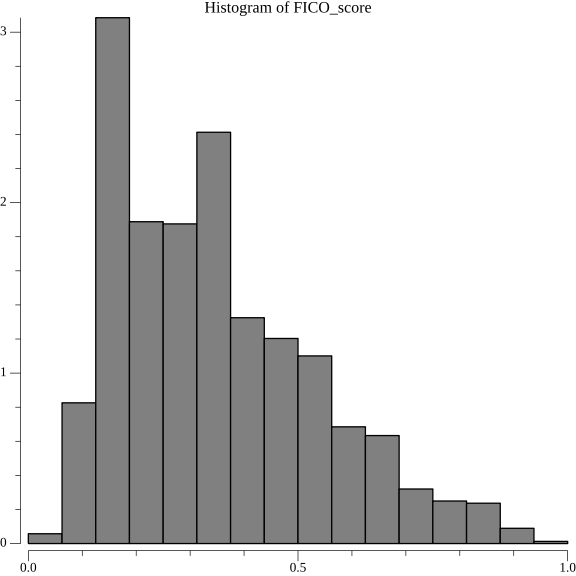

In [6]:
displayScatterPlot("FICO_score")

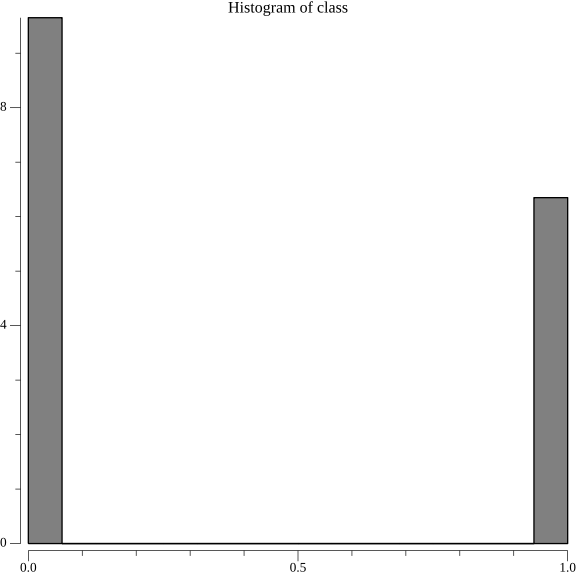

In [7]:
displayScatterPlot("class")